# Part 1: Data and Libraries Setup

In [1]:
#Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Silencing common warnings 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Future Warning
pd.set_option('mode.chained_assignment',None) #Silencing the Setting with Copying Warning

In [2]:
%matplotlib inline

In [3]:
filename = 'adult.data'
df = pd.read_csv(filename,header=None)

In [4]:
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
       'relationship','race','sex','capital-gain','capital-loss','hours-per-week',
        'native-country','salary']
df.columns = header

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Part 2: Data Pre-Processing (1)

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Distribution of Target Variable:**

76% of the population earns below 50K USD which indicates an unequal distribution of the target variable. We will have to consider this while training our ML model

In [8]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [9]:
print('Less than and equal to 50K proportion:',round(df['salary'].value_counts()[0]/
      df['salary'].value_counts().sum()*100,2))
print('More than 50K proportion:',round(df['salary'].value_counts()[1]/
      df['salary'].value_counts().sum()*100,2))

Less than and equal to 50K proportion: 75.92
More than 50K proportion: 24.08


**Identifying categorical and numerical variables separately**

This will help us in using the suitable type of plots to visualise each variable later during EDA

In [10]:
cols_df = pd.DataFrame(df.dtypes)
num_cols = list(cols_df[cols_df[0]=='int64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)[:-1] #excluding target column of salary 
print('Numeric variables includes:','\n',num_cols)
print('\n')
print('Categorical variables includes','\n',cat_cols)

Numeric variables includes: 
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Categorical variables includes 
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


**Removing whitespaces from categorical variables**: The below output shows us that all categorical variables and target variable have whitespaces. Let us clean this first before looking at missing values

In [11]:
for i in cat_cols:
    print(i,'\n',df[i].unique())
    print()

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex 
 [' Male' ' Female']

native-country 
 [' United-States' ' Cuba

In [12]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
#Using pandas .strip() function to remove both right and left whitepsace
for i in cat_cols:
    df[i] = df[i].str.strip()
    
df['salary'] = df['salary'].str.strip()

In [14]:
for i in cat_cols:
    print(i,'\n',df[i].unique())
    print()

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex 
 ['Male' 'Female']

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Hondur

**Treating Missing Values**

In [15]:
# Data description mentions that unknown values are repalced with '?'. Let us check counts for it

for i in list(df.columns):
    print(i,df[df[i]=='?'][i].count())

age 0
workclass 1836
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 583
salary 0


In [16]:
#Replacing '?' string with NaN values
df.replace(to_replace='?',value=np.nan,inplace=True)

In [17]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

All 3 variables with missing values are categorical in nature. As we have a larger number of available observations, let us drop these observations and use rest of the data for analysis

In [18]:
df.dropna(axis=0,inplace=True)

# Part 3: Exploratory Data Analysis:

This section is split into 2 parts where visualisations are bifurcated depending on the variable type - numeric and categorical

## Numeric Variables

**1. Pairplot observations**

- Less than 50k salary bracket is skewed towards younger population whereas more than 50k salary is comprised of older population
- Age and education seem to have some positive correlation which has a direct impact on the salary i.e. older and more educated people fall in the higher salary bracket 

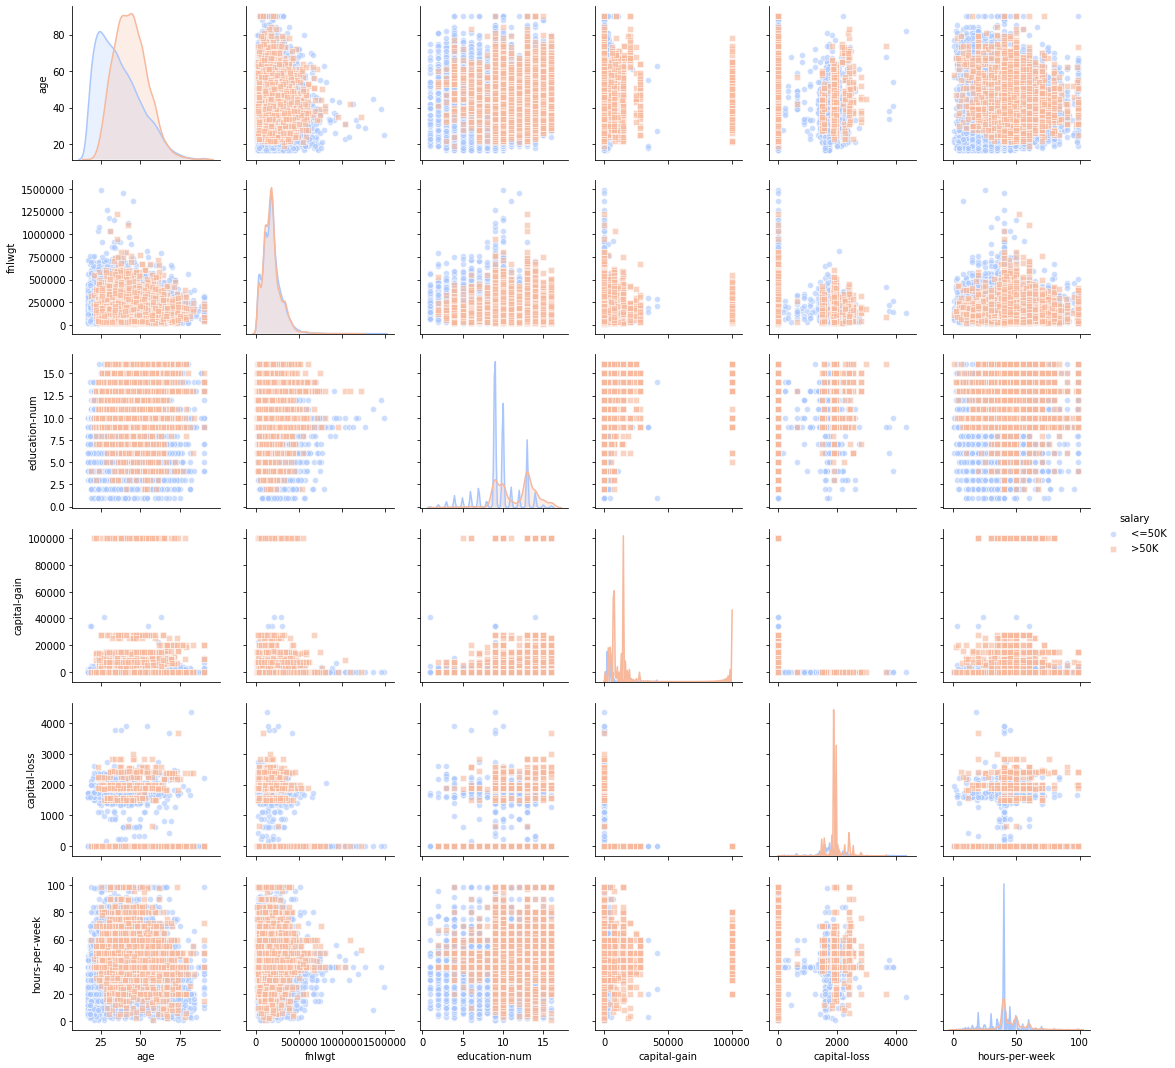

In [19]:
sns.pairplot(df,palette='coolwarm',hue='salary',markers=["o", "s"],plot_kws={'alpha': 0.6})
plt.show()

**2. Correlation between numberic variables:** There is no strong positive or negative correlation between these variables. Thus we are unlikely to run into any multi-collinearity issues in the model

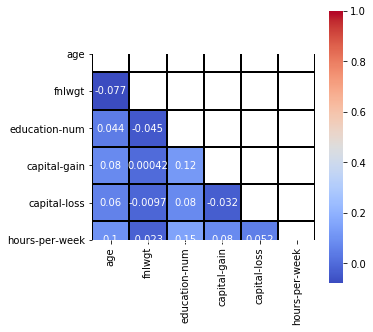

In [20]:
plt.figure(figsize=(5,5))
correlation = df.corr()
matrix = np.triu(correlation)
sns.heatmap(correlation,cmap='coolwarm',square=True,linecolor='black',linewidths=1,
            mask=matrix,annot=True)
plt.show()

**3. Histograms for each variable:** 

- In line with pairplot observations, younger population falls under the lower income category whereas the age distribution for above 50K income is normally distributed
- The mean observation of education level is higher for the above 50k income group with most observations falling above education level of 9 
- Capital gain and capital loss have largely zero values hence we will exclude it from our feature matrix
- Also, fnlwgt by definition is a control parameter kept in the census data. We may need to exclude it later from our model depending on it's impact on performance
- Majority of lower income group individuals work for less than 40 hours whereas the higher income group individuals have a more right skewed distribution of working hours  

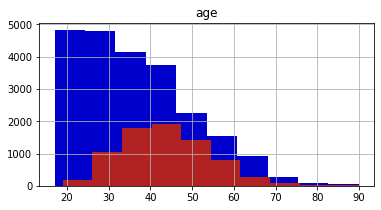

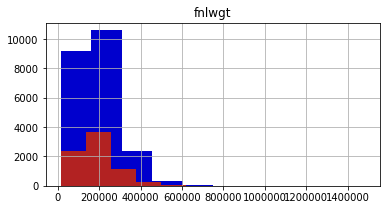

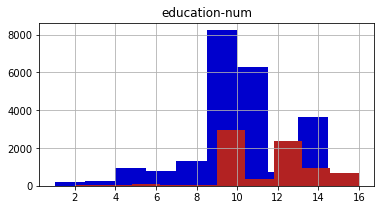

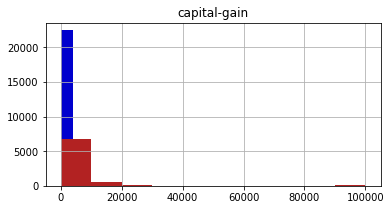

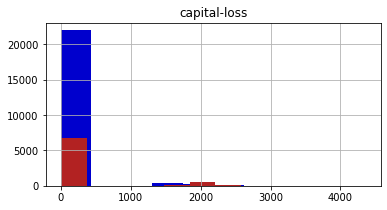

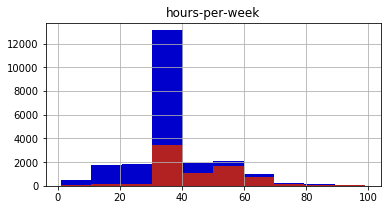

In [21]:
for i in num_cols:
    plt.figure(figsize=(6,3))
    df[df['salary']=='<=50K'][i].hist(color='mediumblue')
    df[df['salary']=='>50K'][i].hist(color='firebrick')
    plt.title(i)
    plt.show()

## Categorical Variables

**Count plot observations**: We are only looking at top 6 categories for each variable on different salary levels and total level (for benchmarking our observations) 

- Leading attributes of <=50K income group:
    - No clear distinction on the workclass since both groups are majorly employed in the private sector
    - High school or some college graduates
    - Unmarried (could be partly due to younger age)
    - Common occupation includes craft/repair, admin-clerical and other services (may be unorganised in nature)
    - Equal proportion of individuals who are not in a family setting and are husbands
    - Race distribution is similar to overall population distribution for this group 
    - Gender and native country follow a pattern similar to the entire population for both the groups (i.e. largely males from USA itself) 


- Leading attributes of >50K income group:
    - Largely employed in the private sector
    - More frequenct bachlor degree holders (in line with our observation on higher education level)
    - Significant proportion is married and living with a spouse
    - These individuals hold highly specialised positions in the workforce like executive management and prof-specialty (which partly explain the higher income)
    - Most play an active family role as a husband or wife
    - Whites dominate this income group, however it should be noted this is also the general population distribution

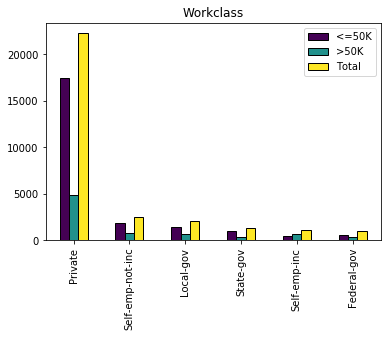

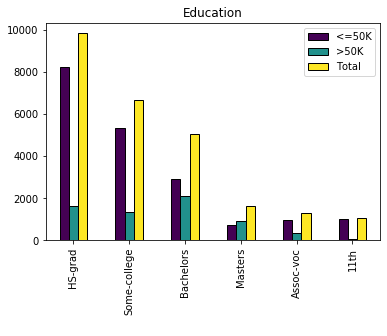

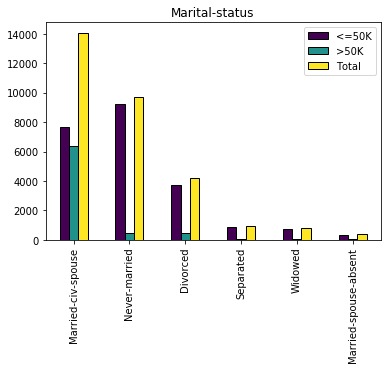

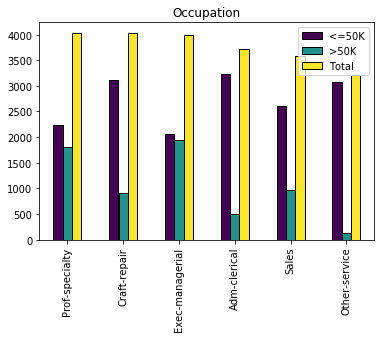

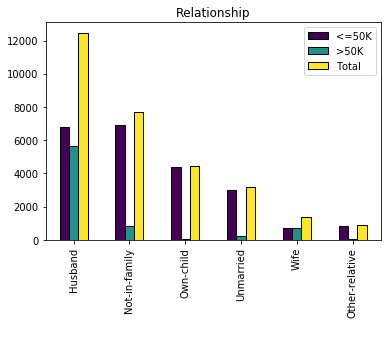

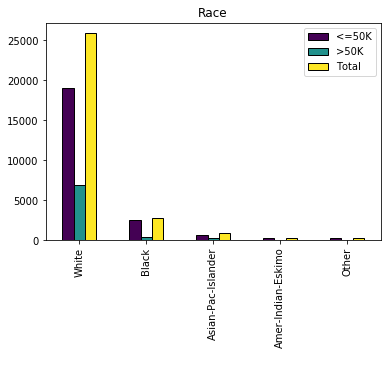

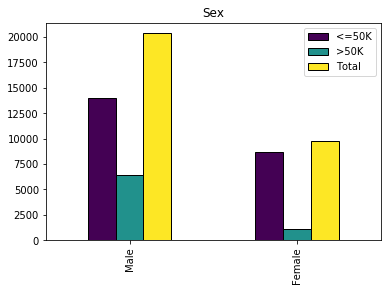

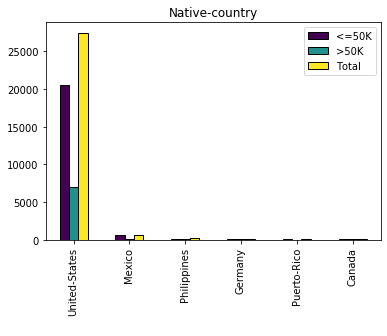

In [22]:
# Instead of using sns.catplot() we use the below loop to create a cross tab 
# which will also include the total column for better comparison

for i in cat_cols:
    ct = pd.crosstab(df[i],df['salary'],margins=True, margins_name="Total")
    ct.drop(labels='Total',axis=0,inplace=True) #Removing subtotal row 
    ct.sort_values(by='Total',ascending=False,inplace=True) #Sorting based on total column
    #Selecting only top 6 categories for plotting
    ct.iloc[:6,:].plot(kind='bar',colormap='viridis',edgecolor='black')  
    plt.xlabel(' ')
    plt.title(str(i).capitalize())
    plt.legend(loc=1)
    plt.show()

# Part 4: Data Pre-Processing (2)

**In this section, we will create separate feature matrix and target variable, encode the categorical data, split the data in train & test sets followed by scaling the numeric variables**

**1. Separating feature matrix and target variable**

In [19]:
#We exclude capital-gain and capital-loss in the feature matrix since majority are zero values

X = df.drop(['capital-gain','capital-loss','salary'],axis=1) 
y = df.iloc[:,-1]

**2. Encoding the categorical data**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
X.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States


In [22]:
#Separating the categorical variables in feature matrix that need to be encoded 

cols_X = pd.DataFrame(X.dtypes)
X_cat_cols = list(cols_X[cols_X[0]=='object'].index)
X_num_cols = list(cols_X[cols_X[0]=='int64'].index)

In [23]:
X = pd.get_dummies(data=X,prefix=X_cat_cols,drop_first=True)

In [24]:
X.head(2)

,age,fnlwgt,education-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**3. Splitting data into training and testing sets**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

**4. Scaling of continuous variables in the feature matrix**

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
X_train.head(2)

,age,fnlwgt,education-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
4482,26,159897,10,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14142,38,201410,13,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
X_train[X_num_cols] = sc.fit_transform(X_train[X_num_cols])
X_test[X_num_cols] = sc.transform(X_test[X_num_cols])

# Part 5: Classification Model Training 

First let us train different classification models on our dataset. After identifying the top 2 models with highest ROC AUC score, we will move on to hyperparameter tuning in the next phase  

## (I) Identifying Top Performing Classification Models

**1. Random Forest Classifier** 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(random_state=101) 
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
rf_ac = metrics.accuracy_score(y_test,rf_y_pred)
rf_roc = metrics.roc_auc_score(y_test,rf_y_pred)
print('Accuracy score: ',rf_ac)
print('ROC AUC score : ',rf_roc)

Accuracy score:  0.8123591035671661
ROC AUC score :  0.7205110460571241


**2. Support Vector Classifier - Linear Kernel** 

In [30]:
#Linear Kernel

from sklearn.svm import SVC

svc_l = SVC(kernel='linear',random_state=101)
svc_l.fit(X_train,y_train)
svcl_y_pred = svc_l.predict(X_test)
svcl_ac = metrics.accuracy_score(y_test,svcl_y_pred)
svcl_roc = metrics.roc_auc_score(y_test,svcl_y_pred)
print('Accuracy score: ',svcl_ac)
print('ROC AUC score : ',svcl_roc)

Accuracy score:  0.8273438536003183
ROC AUC score :  0.7392645359960309


**3. Support Vector Classifier - Gaussian RBF** 

In [31]:
#Gaussian rbf kernel

svc_r = SVC(kernel='rbf',C=100,gamma=0.1,random_state=101)
svc_r.fit(X_train,y_train)
svcr_y_pred = svc_r.predict(X_test)
svcr_ac = metrics.accuracy_score(y_test,svcr_y_pred)
svcr_roc = metrics.roc_auc_score(y_test,svcr_y_pred)
print('Accuracy score: ',svcr_ac)
print('ROC AUC score : ',svcr_roc)

Accuracy score:  0.8177960482694603
ROC AUC score :  0.7505912070932036


**4. Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='lbfgs',random_state=101)
log.fit(X_train,y_train)
log_y_pred = log.predict(X_test)
log_ac = metrics.accuracy_score(y_test,log_y_pred)
log_roc = metrics.roc_auc_score(y_test,log_y_pred)
print('Accuracy score: ',log_ac)
print('ROC AUC score : ',log_roc)

Accuracy score:  0.8289351544887946
ROC AUC score :  0.7413354314159495


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


**5. K-Nearest Neighbours**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
knn_ac = metrics.accuracy_score(y_test,knn_y_pred)
knn_roc = metrics.roc_auc_score(y_test,knn_y_pred)
print('Accuracy score: ',knn_ac)
print('ROC AUC score : ',knn_roc)

Accuracy score:  0.831056889006763
ROC AUC score :  0.7610386424343616


**6. Naive Bayes Classifier**

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_y_pred = nb.predict(X_test)
nb_ac = metrics.accuracy_score(y_test,nb_y_pred)
nb_roc = metrics.roc_auc_score(y_test,nb_y_pred)
print('Accuracy score: ',nb_ac)
print('ROC AUC score : ',nb_roc)

Accuracy score:  0.5658400742607081
ROC AUC score :  0.6886226618553568


In [37]:
method = np.array(['Random Forest','SVC Linear','SVC Gaussian rbf','Logistic Regression','KNN','Naive Bayes'])
ac_scores = np.array([rf_ac,svcl_ac,svcr_ac,log_ac,knn_ac,nb_ac])
roc_scores = np.array([rf_roc,svcl_roc,svcr_roc,log_roc,knn_roc,nb_roc])

# results = pd.DataFrame(data=ac_scores,columns='Accuracy Score',index=method)

**Top 2 models:**

- From this section, we can see that KNN performs the best in terms of both accuracy and ROC AUC score
- The second best model is the non-linear SVM model with rbf kernel

## (II) Hyper-parameter Tuning of Top 2 Models

**1. K-Nearest Neighbors**

Grid Search Method

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'n_neighbors' : np.arange(1,41)}

In [40]:
knn2 = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn2,param_grid=param_grid,scoring='roc_auc',refit=True,verbose=3,cv=3)

In [41]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=1, score=0.715, total=   5.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.692, total=   4.4s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.704, total=   4.2s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.782, total=   6.3s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.770, total=   5.8s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.775, total=   5.7s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.818, total=   7.5s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.804, total=   7.9s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.811, total=   7.6s
[CV] n_neighbors=4 ...................................................
[CV] .

[CV] ...................... n_neighbors=21, score=0.879, total=  10.9s
[CV] n_neighbors=21 ..................................................
[CV] ...................... n_neighbors=21, score=0.873, total=  10.7s
[CV] n_neighbors=21 ..................................................
[CV] ...................... n_neighbors=21, score=0.874, total=  10.6s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.879, total=  10.9s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.873, total=  10.8s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.873, total=  10.8s
[CV] n_neighbors=23 ..................................................
[CV] ...................... n_neighbors=23, score=0.880, total=  11.0s
[CV] n_neighbors=23 ..................................................
[CV] .

[CV] ...................... n_neighbors=40, score=0.878, total=  14.8s
[CV] n_neighbors=40 ..................................................
[CV] ...................... n_neighbors=40, score=0.876, total=  14.5s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 22.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [42]:
grid.best_params_

{'n_neighbors': 40}

In [43]:
grid_y_pred = grid.predict(X_test)
grid_ac = metrics.accuracy_score(y_test,grid_y_pred)
grid_roc = metrics.roc_auc_score(y_test,grid_y_pred)
print('Accuracy score: ',grid_ac)
print('ROC AUC score : ',grid_roc)

Accuracy score:  0.8294655881182867
ROC AUC score :  0.7524899169371655


The best hyper-parameters give us a lower ROC AUC score than our initial training model of 35 neighbours. Let us **re-evaluate this result using the elbow method to choose the ideal n_neighbors**

Elbow method

In [44]:
knn3_roc_auc = []

for i in range(1,60):
    knn3 = KNeighborsClassifier(n_neighbors=i)
    knn3.fit(X_train,y_train)
    knn3_y_pred = knn3.predict(X_test)
    knn3_roc_auc.append(metrics.roc_auc_score(y_test,knn3_y_pred))

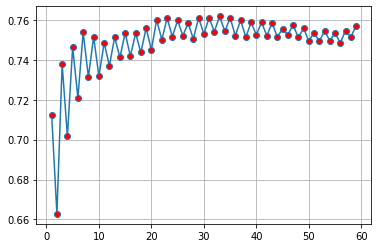

In [48]:
plt.plot(np.arange(1,60),knn3_roc_auc,marker='o',markerfacecolor='red')
plt.grid(True)

From the above graph, we can conclude that our initial **estimate of 35 neighbors gives us one of the best ROC AUC scores**. Hence, we will consider the first knn model as the best model for now